In [3]:
#Importing of libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#Importing of the dataset
path='/content/drive/MyDrive/Dataset/Employee salaries.csv'
df=pd.read_csv(path)
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [11]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [12]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
df['work_year'].value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

In [14]:
df['experience_level'].value_counts()

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [15]:
df['company_size'].value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [18]:
df.groupby('employment_type')['job_title'].value_counts().to_frame()

count
employment_type job_title                                
CT              Applied Machine Learning Scientist      1
                Business Data Analyst                   1
                Staff Data Scientist                    1
                Principal Data Scientist                1
                ML Engineer                             1
...                                                   ...
PT              AI Scientist                            2
                3D Computer Vision Researcher           1
                Computer Vision Engineer                1
                Data Analyst                            1
                ML Engineer                             1

[64 rows x 1 columns]

In [22]:
df.groupby('job_title')['salary_in_usd'].mean() #Average salary based on job title

job_title
3D Computer Vision Researcher                 5409.000000
AI Scientist                                 66135.571429
Analytics Engineer                          175000.000000
Applied Data Scientist                      175655.000000
Applied Machine Learning Scientist          142068.750000
BI Data Analyst                              74755.166667
Big Data Architect                           99703.000000
Big Data Engineer                            51974.000000
Business Data Analyst                        76691.200000
Cloud Data Engineer                         124647.000000
Computer Vision Engineer                     44419.333333
Computer Vision Software Engineer           105248.666667
Data Analyst                                 92893.061856
Data Analytics Engineer                      64799.250000
Data Analytics Lead                         405000.000000
Data Analytics Manager                      127134.285714
Data Architect                              177873.909091
Data

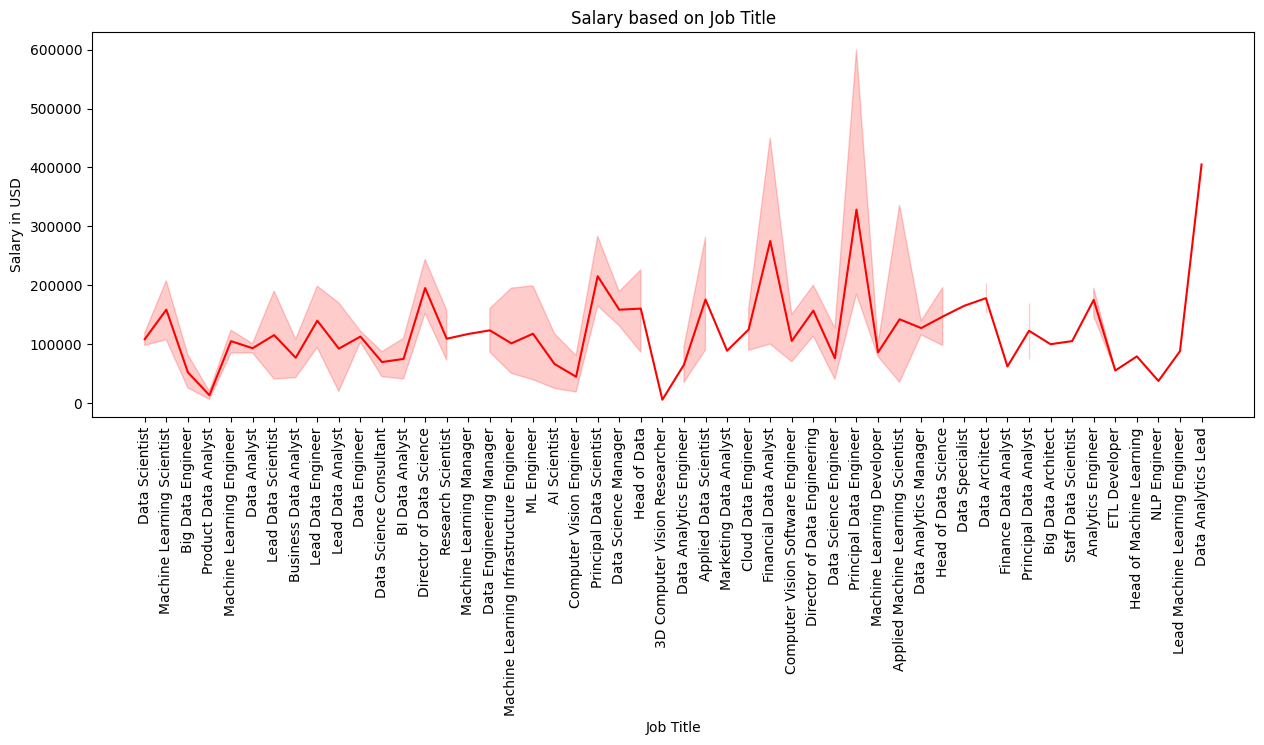

In [87]:
#Plotting of lineplot based on job title and salary
plt.figure(figsize=(15,5))
sns.lineplot(x='job_title',y='salary_in_usd',data=df,color='red')
plt.xticks(rotation=90)
plt.xlabel("Job Title")
plt.ylabel('Salary in USD')
plt.title('Salary based on Job Title')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 68.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


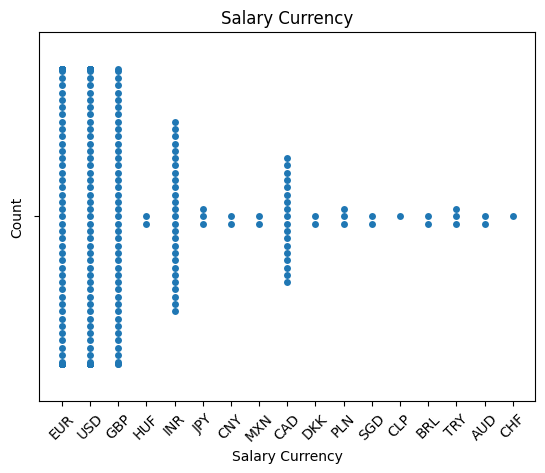

In [75]:
#Swarm plot showing of salary currency
sns.swarmplot(df,x='salary_currency')
plt.xlabel("Salary Currency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title('Salary Currency')
plt.show()

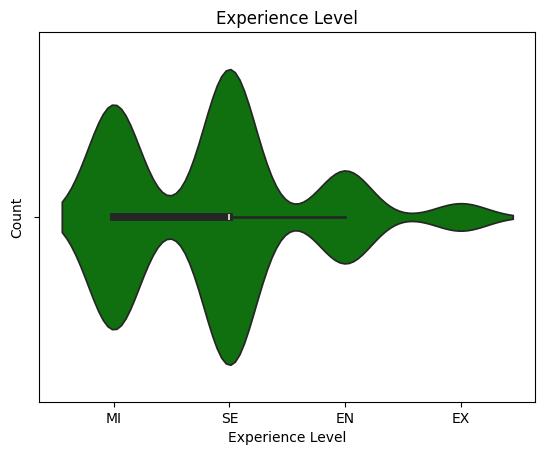

In [81]:
#Violin plot showing of experience level
sns.violinplot(df,x='experience_level',color='green')
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.title('Experience Level')
plt.show()

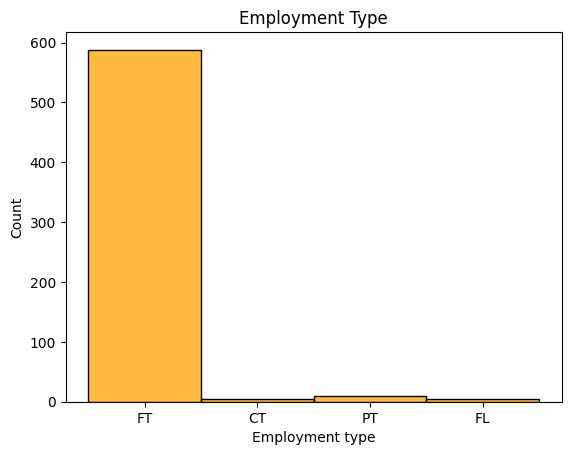

In [82]:
#Employment type
sns.histplot(df,x='employment_type',color='orange')
plt.xlabel("Employment type")
plt.ylabel("Count")
plt.title('Employment Type')
plt.show()

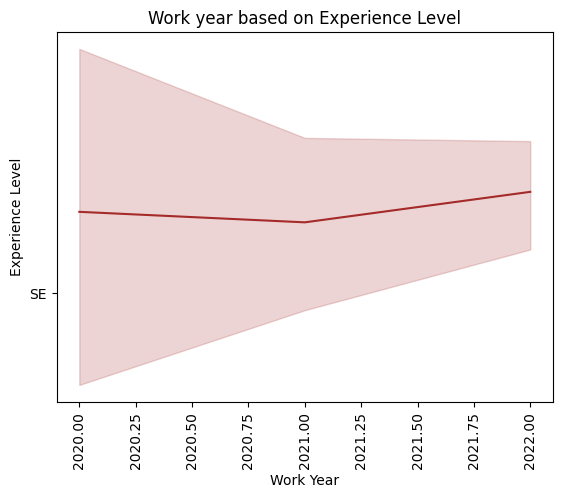

In [83]:
#Work year based on Experience Level
sns.lineplot(x='work_year',y='experience_level',data=df,color='brown')
plt.xlabel("Work Year")
plt.ylabel('Experience Level')
plt.title('Work year based on Experience Level')
plt.xticks(rotation=90)
plt.show()

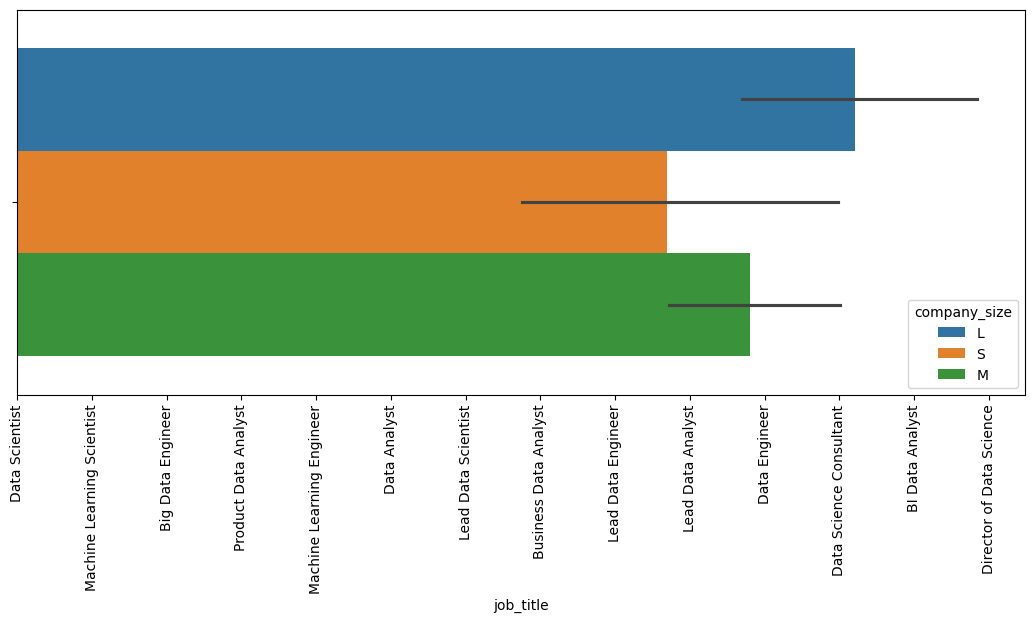

In [46]:
#Job title based on Company size
plt.figure(figsize=(13,5))
sns.barplot(x="job_title", hue="company_size", data=df)
plt.xticks(rotation=90)
plt.show();

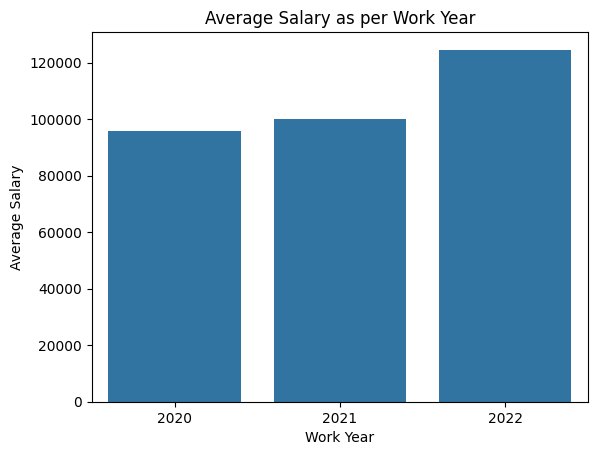

In [68]:
# Average salary as per work year
emp_df=df.groupby('work_year')['salary_in_usd'].mean().reset_index()
sns.barplot(x='work_year', y='salary_in_usd', data=emp_df)
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salary as per Work Year')
plt.show()


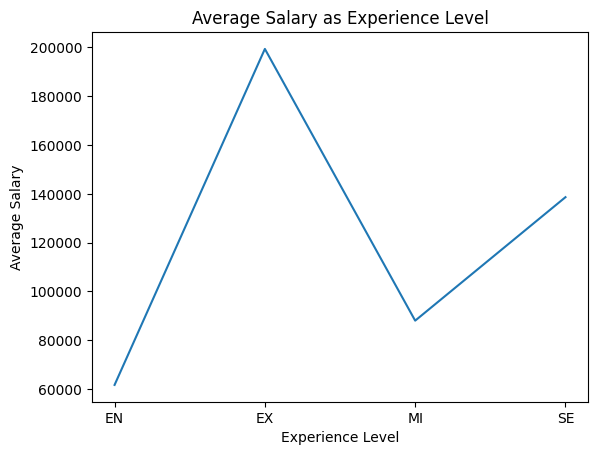

In [84]:
#Average salary based on experience level
emp_df=df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
sns.lineplot(x='experience_level', y='salary_in_usd', data=emp_df)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salary as Experience Level')
plt.show()


In [92]:
#Pie Chart showing of the variation in the top5 jobs
X=df["job_title"].head(5)
Y=df["work_year"].tail(5)

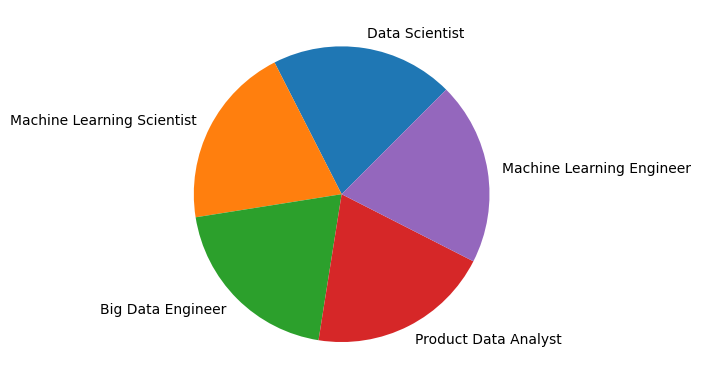

In [95]:
job_title=X
work_year=Y
plt.pie(work_year,labels=job_title,startangle=45)
plt.show();